Get data from sport-tracker diary/workout-list, filtered by walking and dates at 2017 start to end.
Copy corresponding div from browser development tools (chrome f12)
Save it as walks2017.html

In [41]:
file = 'walks2017.html'
html_doc = open(file, 'r').read()
#print(html_doc)


In [42]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html_doc, 'html.parser')

#print(soup.prettify())

<div class="diary-list__list diary-list__ordered-by-date" ng-class="{
			'diary-list__ordered-by-description': orderBy === 'description',
			'diary-list__ordered-by-date': orderBy === 'startTime',
			'diary-list__ordered-by-distance': orderBy === 'totalDistance',
			'diary-list__ordered-by-duration': orderBy === 'totalTime',
			'diary-list__ordered-by-avg-speed': orderBy === 'avgSpeed',
			'diary-list__ordered-by-avg-pace': orderBy === 'avgPace',
			'diary-list__ordered-by-hr': orderBy === 'hrdata.avg',
			'diary-list__ordered-by-energy': orderBy === 'energyConsumption',
			'diary-list__ordered-by-cadence': orderBy === 'cadence.avg'
		}" ng-show="filtered">
 <ul class="diary-list__list-header" ng-class="{ 'is-showing-list-sorters': isShowingListSorters }">
  <li class="sort-by" ng-click="isShowingListSorters = true">
   Sort by
  </li>
  <li class="description" ng-class="{
					desc: orderBy === 'description' &amp;&amp; !reverse
				}" ng-click="changeOrder('description')">
   <b>
    

In [43]:
listat = soup.find_all('ul')
#print(len(listat))
listat = listat[1]
sports = listat.find_all('li')
print("Total walks: %d" % (len(sports)))
print(sports[0])

#import pandas as pd

#for exes in soup.find_all('li'):
    

Total walks: 229
<li class="diary-list__workout activity-id-0" ng-repeat="wo in filtered | orderBy:orderBy:reverse | limitTo:limit" style=""><a href="/workout/takj/5a48abd1205b9b09ad98e04b" target="_blank"><span activity-icon="0" class="activity-icon"><svg><use xlink:href="#activity-icon-0" xmlns:xlink="http://www.w3.org/1999/xlink"></use></svg></span> <span class="description" title=""> </span> <span class="date">Dec 31, 2017</span> <span class="duration">01:06:31</span> <span class="distance">6.58 km</span> <span class="avg-speed">5.9 km/h</span> <span class="avg-pace">10:06/km</span> <span class="hr">0 bpm </span> <span class="energy">631 kcal</span> <span class="cadence">0 rpm</span></a></li>


In [44]:
#sport_dict = [['date', 'distance', 'time', 'avg-speed']]
sport_dict =list()
#soup.b.contents[0]

for st in sports:
    single_sport = list()
    for s in st.find_all('span'):
        if s.get('class')[0] == 'date':
            single_sport.append(s.contents[0])
        if s.get('class')[0] == 'distance':
            single_sport.append(s.contents[0].replace('km',''))
        if s.get('class')[0] == 'duration':
            single_sport.append(s.contents[0])
        if s.get('class')[0] == 'avg-speed':
            single_sport.append(s.contents[0].replace('km/h',''))
    
    sport_dict.append(single_sport)

import pandas as pd
df = pd.DataFrame(sport_dict)
df.columns = ['date', 'time', 'distance', 'avg-speed']
df.head()


,date,time,distance,avg-speed
0,"Dec 31, 2017",01:06:31,6.58,5.9
1,"Dec 30, 2017",01:01:27,3.87,3.8
2,"Dec 27, 2017",00:42:26,3.64,5.1
3,"Dec 26, 2017",01:14:09,4.45,3.6
4,"Dec 24, 2017",01:22:45,5.03,3.6


In [45]:
df.dtypes

date         object
time         object
distance     object
avg-speed    object
dtype: object

In [46]:
df['distance']=df['distance'].astype('float32')
df['avg-speed']=df['avg-speed'].astype('float32')
df.dtypes

date          object
time          object
distance     float32
avg-speed    float32
dtype: object

In [50]:
#df['date'] = df['date'].apply(pd.to_datetime(df['date'], format='%d-%m'))
#df.dtypes
df['date'] = pd.to_datetime(df['date'])
#pd.to_datetime(df['date'])
df.dtypes

date         datetime64[ns]
time                 object
distance            float32
avg-speed           float32
dtype: object

## Write walks to csv, for future development

In [62]:
w = df.to_csv('walks.csv', index=False)

## Load csv and plot polynomial fits by dates

In [33]:
import pandas as pd
try:
    df = pd.read_csv('walks.csv')
except FileNotFoundError:
    print('Using old df')

# convert date to datetime64[ns]
df['date'] = pd.to_datetime(df['date'])
#pd.to_datetime(df['date'])
df.dtypes

date         datetime64[ns]
time                 object
distance            float64
avg-speed           float64
dtype: object

In [34]:
import matplotlib.pyplot as plt
import numpy as np
print("mean %.3f" % np.mean(df['avg-speed']))
print("std %.3f" % np.std(df['avg-speed']))
s = np.mean(df['avg-speed']) - 2*np.std(df['avg-speed'])
e = np.mean(df['avg-speed']) + 2*np.std(df['avg-speed'])
#averspeed = [i for i in df['avg-speed'] if (i < e and i > s)]

#print(len(averspeed))
#x = list(range(len(averspeed)))
#fit = np.polyfit(x, averspeed, deg=3)
#p = np.poly1d(fit)
#plt.plot(x, averspeed, 'o')
#for i in range(2,5):
#    fit = np.polyfit(x, averspeed, deg=i)
#    p = np.poly1d(fit)
#    plt.plot(x, p(x))
#plt.plot(fit)
#plt.plot(np.polyfit(y=averspeed, x = range(len(averspeed)), deg=3))
#plt.plot(averspeed)
#plt.show()

mean 4.792
std 1.201


In [35]:
dfs = df.loc[ (df['avg-speed'] < e)  &  (df['avg-speed'] > s)]
print(len(dfs))
dfs.head()

214


,date,time,distance,avg-speed
0,2017-12-31,01:06:31,6.58,5.9
1,2017-12-30,01:01:27,3.87,3.8
2,2017-12-27,00:42:26,3.64,5.1
3,2017-12-26,01:14:09,4.45,3.6
4,2017-12-24,01:22:45,5.03,3.6


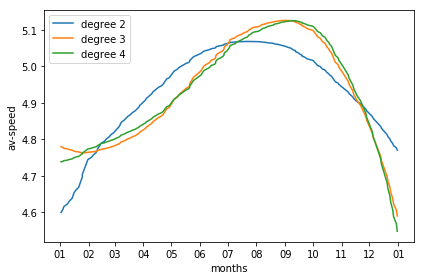

In [36]:
x = list(range(len(dfs['avg-speed'])))
date = list(dfs['date'])

import matplotlib.dates as mdates

months = mdates.MonthLocator()
monthsFmt = mdates.DateFormatter('%m')

fig, ax = plt.subplots()
for i in range(2,5):
    fit = np.polyfit(x, dfs['avg-speed'], deg=i)
    p = np.poly1d(fit)
    ax.plot(date, p(x), label=('degree %d' % i))

#plt.plot(date, dfs['avg-speed'], 'o')

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)

plt.ylabel('av-speed')
plt.xlabel('months')
plt.legend(loc='best')
plt.tight_layout()
plt.show()



## Load snowdepth from fmi

In [8]:
def get_fmi_url_1day(key, place, parameters, date='2017-01-01'):
    url = ('http://data.fmi.fi/fmi-apikey/{0}'
    +'/wfs?request=getFeature&storedquery_id=fmi::observations::weather::multipointcoverage&'
    +'place={1}&'
    +'parameters={2}&'
    +'starttime={3}T00:00:01Z&endtime={3}T23:59:59Z&'
    +'timestep=1440&').format(key, place, parameters, date)
    
    return url

In [9]:
#Lumensyvyys
#fmi-avain


key = '************************'
#avain = key
place = 'joensuu'
parameters = 'snowdepth'

url = get_fmi_url_1day(key, place, parameters)
#

# print(url)


In [10]:
import urllib3
manager = urllib3.PoolManager()
r = manager.request('GET', url)


In [11]:
data =r.data

In [ ]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(data, 'xml')
#print(soup.prettify())

In [ ]:
s = soup.find('gml:doubleOrNilReasonTupleList')
sdepth = float(s.contents[0].replace('\n', ''))
sdepth

In [ ]:
dfs['date'][0].strftime(format='%Y-%m-%d')

In [ ]:
#len(dfs['date'])
import urllib3
from bs4 import BeautifulSoup

def parse_snow_depth(url):
    manager = urllib3.PoolManager()
    r = manager.request('GET', url)
    
    data =r.data
    
    soup = BeautifulSoup(data, 'xml')
    s = soup.find('gml:doubleOrNilReasonTupleList')
    try:
        return float(s.contents[0].replace('\n', ''))
    except AttributeError:
        return 0.0
        
    
def get_snow_depth(date):
    #print(date)
    date = date.strftime(format='%Y-%m-%d')
    key = '*****************'
    #avain = key
    place = 'joensuu'
    parameters = 'snowdepth'

    url = get_fmi_url_1day(key, place, parameters, date)
    return parse_snow_depth(url)

    
def get_snow_depths(dates):
    dd = list()
    for d in dates:
        dd.append(get_snow_depth(d))
    return dd
    

In [ ]:
df2 = dfs.copy()

In [ ]:
snowdepths = get_snow_depths(df2['date'])
df2 = df2.assign(snow= snowdepths)

In [ ]:
df2.head()

In [ ]:
ws = df2.to_csv('walks_snow.csv', index=False)

## Load walks with snow depth (walks_snow.csv)

In [1]:
import pandas as pd

try:
    df2 = pd.read_csv('walks_snow.csv')
except FileNotFoundError:
    print('No walks_snow file be here.\n'
        +'You should probably start from earlier blocks')
    

In [4]:
df2['date'] = pd.to_datetime(df2['date'])
df2.dtypes


date         datetime64[ns]
time                 object
distance            float64
avg-speed           float64
snow                float64
dtype: object

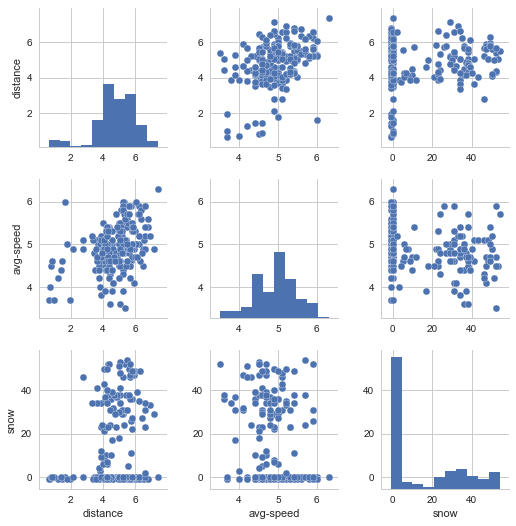

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', context='notebook')
cols = ['date', 'distance', 'avg-speed', 'snow']
sns.pairplot(df2[cols], size=2.5)
plt.show()

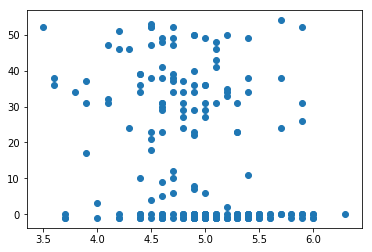

In [13]:
#TO BE CONTINUED, USING walks_snow

import numpy as np
import matplotlib.pyplot as plt

plt.scatter(x = df2['avg-speed'], y = df2['snow'], marker='o')
plt.show()

In [28]:
print(np.mean((df2.loc[df2['snow'] < 1])['avg-speed']))
print(np.mean((df2.loc[df2['snow'] >= 1])['avg-speed']))

5.086440698575165
4.752083318928878


date         datetime64[ns]
time                 object
distance            float64
avg-speed           float64
snow                float64
dtype: object

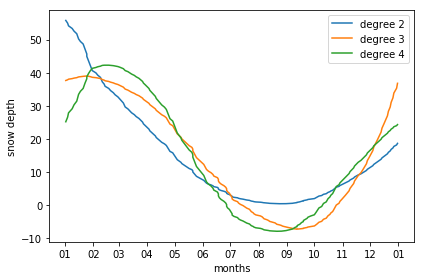

In [19]:
x = list(range(len(df2['snow'])))
date = list(df2['date'])

import matplotlib.dates as mdates

months = mdates.MonthLocator()
monthsFmt = mdates.DateFormatter('%m')

fig, ax = plt.subplots()
for i in range(2,5):
    fit = np.polyfit(x, df2['snow'], deg=i)
    p = np.poly1d(fit)
    ax.plot(date, p(x), label=('degree %d' % i))
    

#plt.plot(date, dfs['avg-speed'], 'o')

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)

plt.ylabel('snow depth')
plt.xlabel('months')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [7]:
df2.sort_values(by=['avg-speed'])

,date,time,distance,avg-speed,snow
164,2017-04-03,01:31:56,5.38,3.5,52.0
3,2017-12-26,01:14:09,4.45,3.6,36.0
4,2017-12-24,01:22:45,5.03,3.6,38.0
69,2017-09-09,00:31:02,1.94,3.7,-1.0
116,2017-06-18,00:10:05,0.62,3.7,-1.0
132,2017-05-23,00:15:49,0.97,3.7,0.0
1,2017-12-30,01:01:27,3.87,3.8,34.0
188,2017-02-11,01:04:21,4.15,3.9,37.0
17,2017-12-02,01:10:35,4.58,3.9,17.0
202,2017-01-23,01:20:39,5.26,3.9,31.0
